In [1]:
from fastai.vision import *

In [17]:
path = {}
path['planet'] = untar_data(URLs.PLANET_TINY)
print(path['planet'])
path['planet'].ls()
(path['planet']/'train').ls()[:5]

/home/ravivijay/.fastai/data/planet_tiny


[PosixPath('/home/ravivijay/.fastai/data/planet_tiny/train/train_17098.jpg'),
 PosixPath('/home/ravivijay/.fastai/data/planet_tiny/train/train_28430.jpg'),
 PosixPath('/home/ravivijay/.fastai/data/planet_tiny/train/train_7879.jpg'),
 PosixPath('/home/ravivijay/.fastai/data/planet_tiny/train/train_38934.jpg'),
 PosixPath('/home/ravivijay/.fastai/data/planet_tiny/train/train_22523.jpg')]

In [4]:
??get_transforms

In [25]:
tfms= {}
tfms['planet'] = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [29]:
#data = {}
data = (ImageList.from_csv(path['planet'], 'labels.csv', folder='train',  suffix='.jpg')
                  .split_by_rand_pct()
                  .label_from_df(label_delim=' ')
                  .transform(tfms['planet'], size=128)
                  .databunch()
                  .normalize(imagenet_stats)
                 ) 

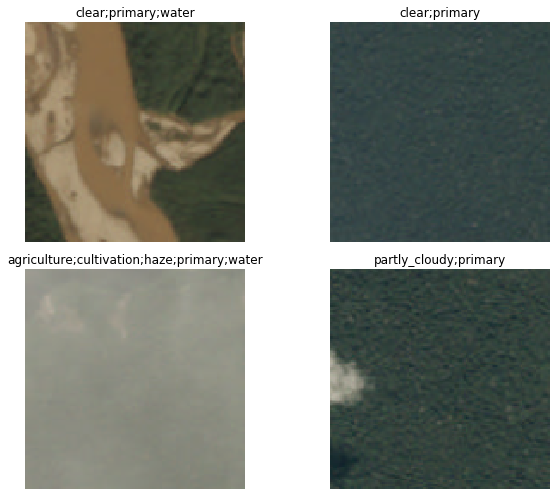

In [32]:
data.show_batch(rows=2, figsize=(9,7))

In [36]:
learn = cnn_learner(data, models.resnet18)
learn.fit_one_cycle(5, 1e-2)
learn.save('planet-multilabel-qs-1')

epoch,train_loss,valid_loss,time
0,1.048040,0.885089,00:00
1,1.001325,0.831535,00:00
2,0.937259,0.804359,00:01
3,0.872152,0.777057,00:00
4,0.826280,0.731809,00:00


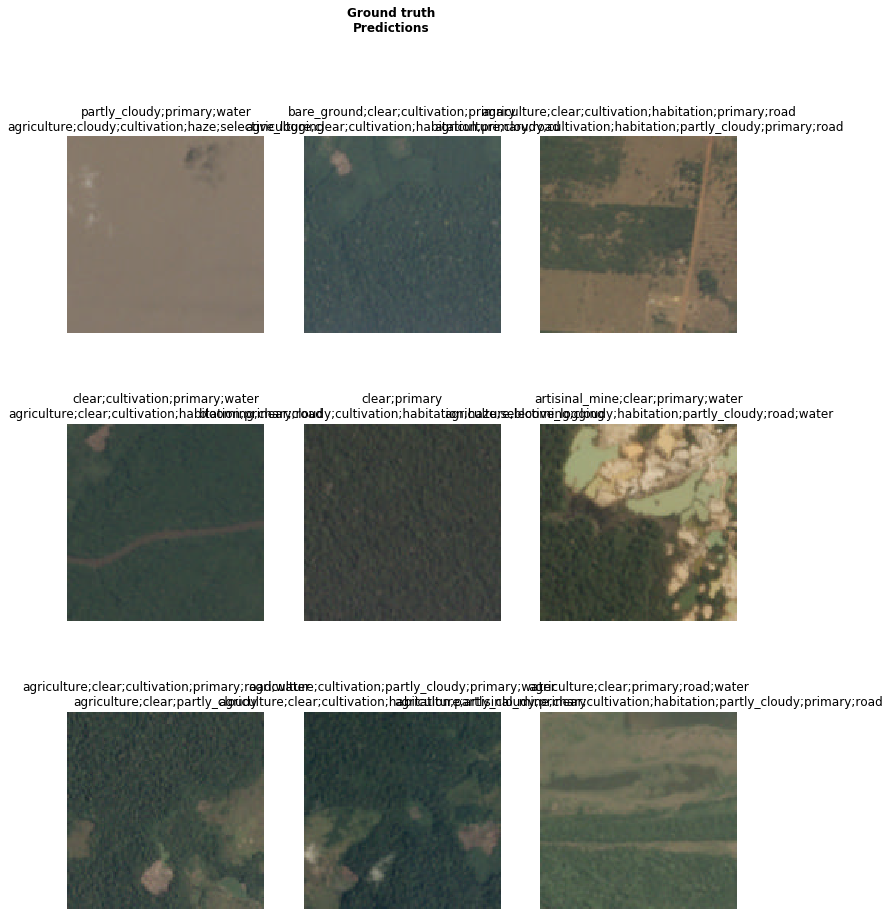

In [35]:
learn.show_results(rows=3, figsize=(12,15))